# Lab 2: Códigos Cíclicos

Alunos: Fernando Zanchitta e Guilherme Kowalczuk

# 1. Simulação

In [1]:
from channel import BSC
from encoder import NaiveEncoder, ConvolutionalEncoder
from lab1 import Simulator
from helpers import safe_load

import numpy as np
import random
random.seed(2023)

p = [5e-1, 2e-1, 1e-1, 5e-2, 2e-2, 1e-2, 5e-3, 2e-3, 1e-3, 5e-4, 2e-4, 1e-4, 5e-5, 2e-5, 1e-5]

## 1.1. Naive Encoder

In [4]:
k = 4
l = 1000000//k
naive_encoder = NaiveEncoder()

channels = map(BSC, p)
sim = map(lambda channel: Simulator(naive_encoder, channel, k=k, l=l), channels)
naive_sim = list(map(Simulator.simulate, sim))

naive_sim = safe_load(f'lab3_values/naive.pickle', lambda: naive_sim)

print(list(zip(p, naive_sim)))

[(0.5, 0.499331), (0.2, 0.199325), (0.1, 0.100095), (0.05, 0.050212), (0.02, 0.019917), (0.01, 0.00979), (0.005, 0.005006), (0.002, 0.001973), (0.001, 0.001033), (0.0005, 0.000521), (0.0002, 0.000197), (0.0001, 9.7e-05), (5e-05, 4.7e-05), (2e-05, 1.9e-05), (1e-05, 8e-06)]


## 1.2. Convolutional Encoder

In [5]:
def simulate_convolutional(m,G):
    n = 3
    conv_encoder = ConvolutionalEncoder(n, m, G)

    k = 100000
    l = 1

    channels = map(BSC, p)
    sim = map(lambda channel: Simulator(conv_encoder, channel, k=k, l=l), channels)
    conv_sim = list(map(Simulator.simulate, sim))

    return conv_sim

mG = [
    (3, np.array([[1, 0, 1, 1], [1, 1, 0, 1], [1, 1, 1, 1]])),
    (4, np.array([[1,0,1,0,1], [1,1,0,1,1], [1,1,1,1,1]])), 
    (6, np.array([[1,0,0,1,1,1,1], [1,0,1,0,1,1,1], [1,1,0,1,1,0,1]])),
]

conv_sim = []
for m,G in mG:
    conv_sim = safe_load(f'lab3_values/{m}.pickle', lambda: simulate_convolutional(m,G))
    conv_sim.append(conv_sim)
    print(list(zip(p, conv_sim)))

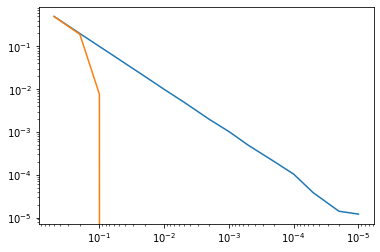

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.gca()
plt.plot(p, naive_sim, p, conv_sim)
ax.set_yscale('log')
ax.set_xscale('log')
ax.invert_xaxis()